In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats 

In [2]:
# Load sentiment data from CSV file 
# Replace 'path_to_your_data.csv' with the path to your CSV file 
# Replace 'sentiment_column' with the name of the column containing sentiment scores 
df = pd.read_csv('sentiments.csv') 
df['sentiments'] = df['Sentiment'].apply(lambda x: 1 if x == 'negative' else 2 if x == 'neutral' else 3)
sentiment_scores = df['sentiments'].values  

In [3]:
benchmark_value = 0.0 # Define your benchmark value 

In [4]:
# Perform the one-sample t-test 
mean_score = np.mean(sentiment_scores) 
std_dev = np.std(sentiment_scores, ddof=1)  # Sample standard deviation 
n = len(sentiment_scores) 

In [5]:
from scipy.stats import shapiro 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 

In [6]:
# Assuming you have your sentiment scores in a Pandas DataFrame 
sentiment_scores = df['sentiments'] 

In [7]:
# Shapiro-Wilk Test 
stat, p_value = shapiro(sentiment_scores) 
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}") 

Shapiro-Wilk Test Statistic: 0.6473, P-Value: 0.0000


c:\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5642.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
# Interpret the p-value 
if p_value > 0.05: 
    print("Data is normally distributed (Fail to reject H0).") 
else: 
    print("Data is not normally distributed (Reject H0).") 

Data is not normally distributed (Reject H0).


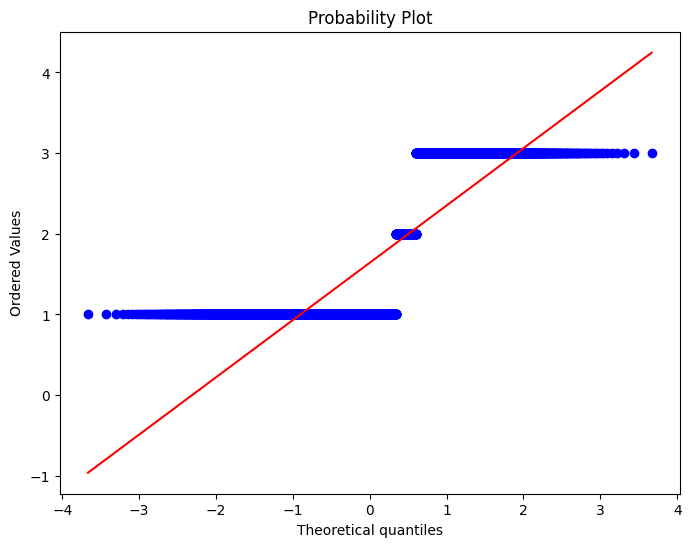

In [9]:
# Q-Q Plot 
plt.figure(figsize=(8, 6)) 
stats.probplot(sentiment_scores, dist="norm", plot=plt) 
plt.show() 

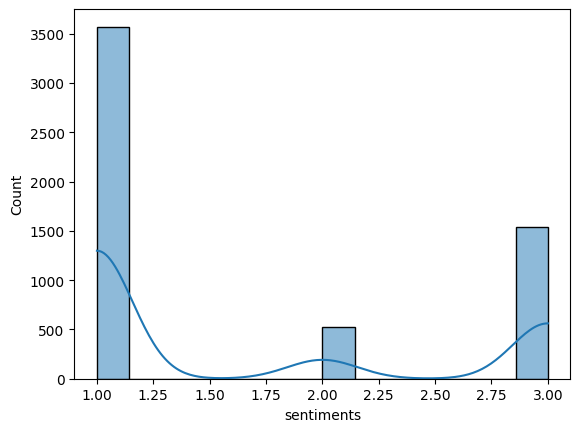

In [10]:
# Histogram 
sns.histplot(sentiment_scores, kde=True) 
plt.show() 

In [11]:
from scipy.stats import levene 
# Assuming you have sentiment scores grouped by database 
grouped_sentiments = [group['sentiments'] for name, group in df.groupby('Trading app')] 
# Levene's Test for equal variances 
stat, p_value = levene(*grouped_sentiments) 
print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}") 
# Interpret the p-value 
if p_value > 0.05: 
    print("Variances are equal (Fail to reject H0).") 
else: 
    print("Variances are not equal (Reject H0).") 

Levene's Test Statistic: 23.3714, P-Value: 0.0000
Variances are not equal (Reject H0).


In [12]:
from scipy.stats import f_oneway, kruskal, shapiro  # For ANOVA, Kruskal-Wallis H test, and Shapiro-Wilk normality test

# If data is normally distributed and variances are equal, perform ANOVA 
if p_value > 0.05 and shapiro(sentiment_scores)[1] > 0.05: 
    f_statistic, anova_p_value = f_oneway(*grouped_sentiments) 
    print(f"ANOVA F-Statistic: {f_statistic:.4f}, P-Value: {anova_p_value:.4f}") 
    if anova_p_value < 0.05: 
        print("Reject the null hypothesis: There is a significant difference between the groups.") 
    else: 
        print("Fail to reject the null hypothesis: No significant difference between  the groups.") 
else: 
# If data is not normally distributed or variances are not equal, perform Kruskal Wallis H Test 
    h_statistic, kruskal_p_value = kruskal(*grouped_sentiments) 
    print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value: {kruskal_p_value:.4f}") 
if kruskal_p_value < 0.05: 
    print("Reject the null hypothesis: There is a significant difference between  the groups.") 
else: 
    print("Fail to reject the null hypothesis: No significant difference between  the groups.") 

Kruskal-Wallis H Statistic: 472.4375, P-Value: 0.0000
Reject the null hypothesis: There is a significant difference between  the groups.


Pearson Correlation between Sentiment and Comment Length: -0.1347, P-Value: 0.0000
Spearman Correlation between Sentiment and Comment Length: -0.1504, P-Value: 0.0000


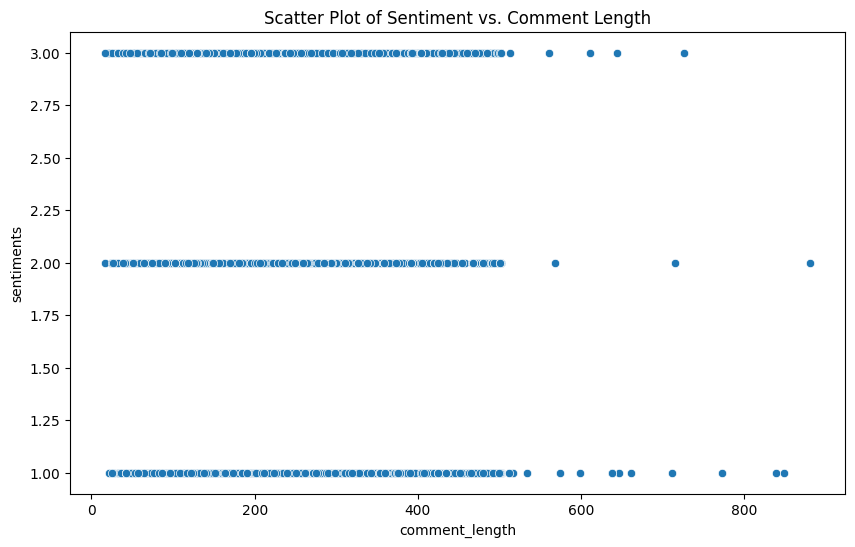

In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr, spearmanr 

# Create additional variables if needed 
# For example, calculate the comment length if it's not already in your data 
df['comment_length'] = df['Comment'].apply(len) 
# If you have a timestamp or timing information, ensure it's in a datetime format 
# df['timestamp'] = pd.to_datetime(df['timestamp']) 
# Checking correlations between sentiment and comment length 
pearson_corr, pearson_p_value = pearsonr(df['sentiments'], df['comment_length']) 
spearman_corr, spearman_p_value = spearmanr(df['sentiments'], df['comment_length']) 
print(f"Pearson Correlation between Sentiment and Comment Length: {pearson_corr:.4f}, P-Value: {pearson_p_value:.4f}") 
print(f"Spearman Correlation between Sentiment and Comment Length: {spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}") 
# Visualizing the correlation with a scatter plot 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='comment_length', y='sentiments', data=df) 
plt.title('Scatter Plot of Sentiment vs. Comment Length') 
plt.show() 


In [14]:

import pandas as pd 
# Create additional features (e.g., comment length) 
df['comment_length'] = df['Comment'].apply(len) 
import numpy as np 
import scipy.stats as stats 
# Calculate Pearson correlation coefficient and p-value 
pearson_corr, pearson_p = stats.pearsonr(df['comment_length'], df['sentiments']) 
# Calculate Spearman's rank correlation coefficient and p-value 
spearman_corr, spearman_p = stats.spearmanr(df['comment_length'], df['sentiments']) 
# Print results 
print(f'Pearson Correlation Coefficient: {pearson_corr:.4f}') 
print(f'Pearson p-value: {pearson_p:.4f}') 
print(f'Spearman Correlation Coefficient: {spearman_corr:.4f}') 
print(f'Spearman p-value: {spearman_p:.4f}')

Pearson Correlation Coefficient: -0.1347
Pearson p-value: 0.0000
Spearman Correlation Coefficient: -0.1504
Spearman p-value: 0.0000


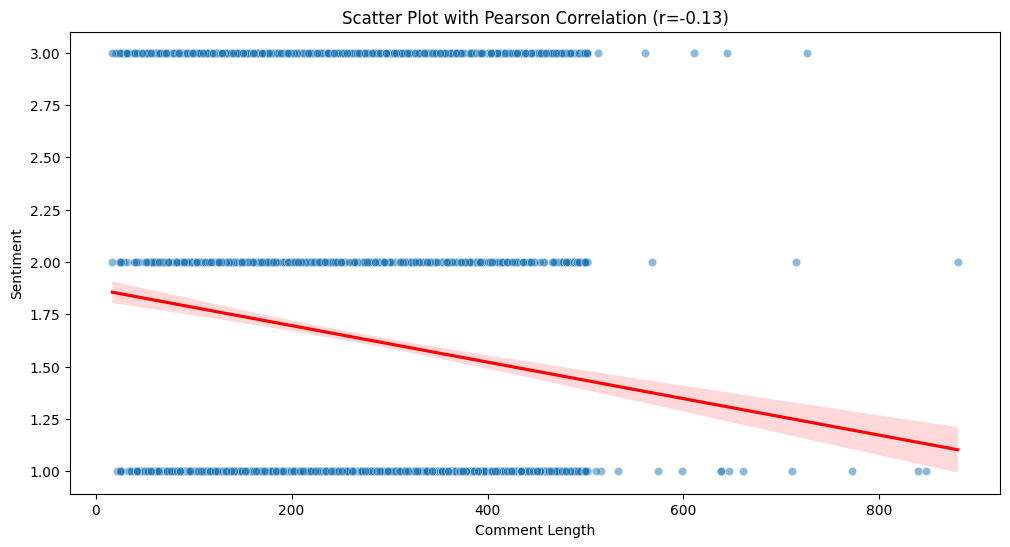

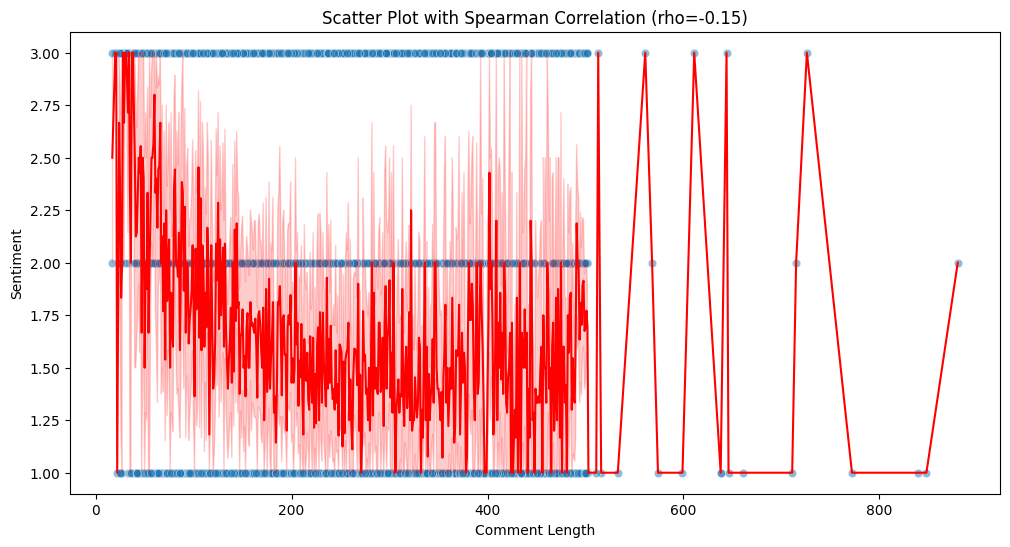

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# Scatter plot with Pearson correlation line 
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x='comment_length', y='sentiments', data=df, alpha=0.5) 
sns.regplot(x='comment_length', y='sentiments', data=df, scatter=False, color='r') 
plt.title(f'Scatter Plot with Pearson Correlation (r={pearson_corr:.2f})') 
plt.xlabel('Comment Length') 
plt.ylabel('Sentiment') 
plt.show() 
# Scatter plot with Spearman correlation line (non-parametric) 
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x='comment_length', y='sentiments', data=df, alpha=0.5) 
sns.lineplot(x='comment_length', y='sentiments', 
data=df.sort_values(by='comment_length'), color='r') 
plt.title(f'Scatter Plot with Spearman Correlation (rho={spearman_corr:.2f})') 
plt.xlabel('Comment Length') 
plt.ylabel('Sentiment') 
plt.show() 